#EC9630 - Machine Learning Laboratory - 05
#Task : Unsuppervised Learning
#Name : SALMAN MM
#Reg : 2021/E/102
#Date : 18.04.2025

In [11]:
# Step 1: Unzip the dataset
import zipfile

zip_path = '/content/online+shoppers+purchasing+intention+dataset.zip'
extract_path = '/content/dataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [12]:
# Step 2: Load the dataset
import pandas as pd

csv_path = extract_path + '/online_shoppers_intention.csv'
data = pd.read_csv(csv_path)


In [14]:
# Step 3: Preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
label_encoder = LabelEncoder()
for col in data.select_dtypes(include=['object']).columns:
    data[col] = label_encoder.fit_transform(data[col])

# Scale numerical features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


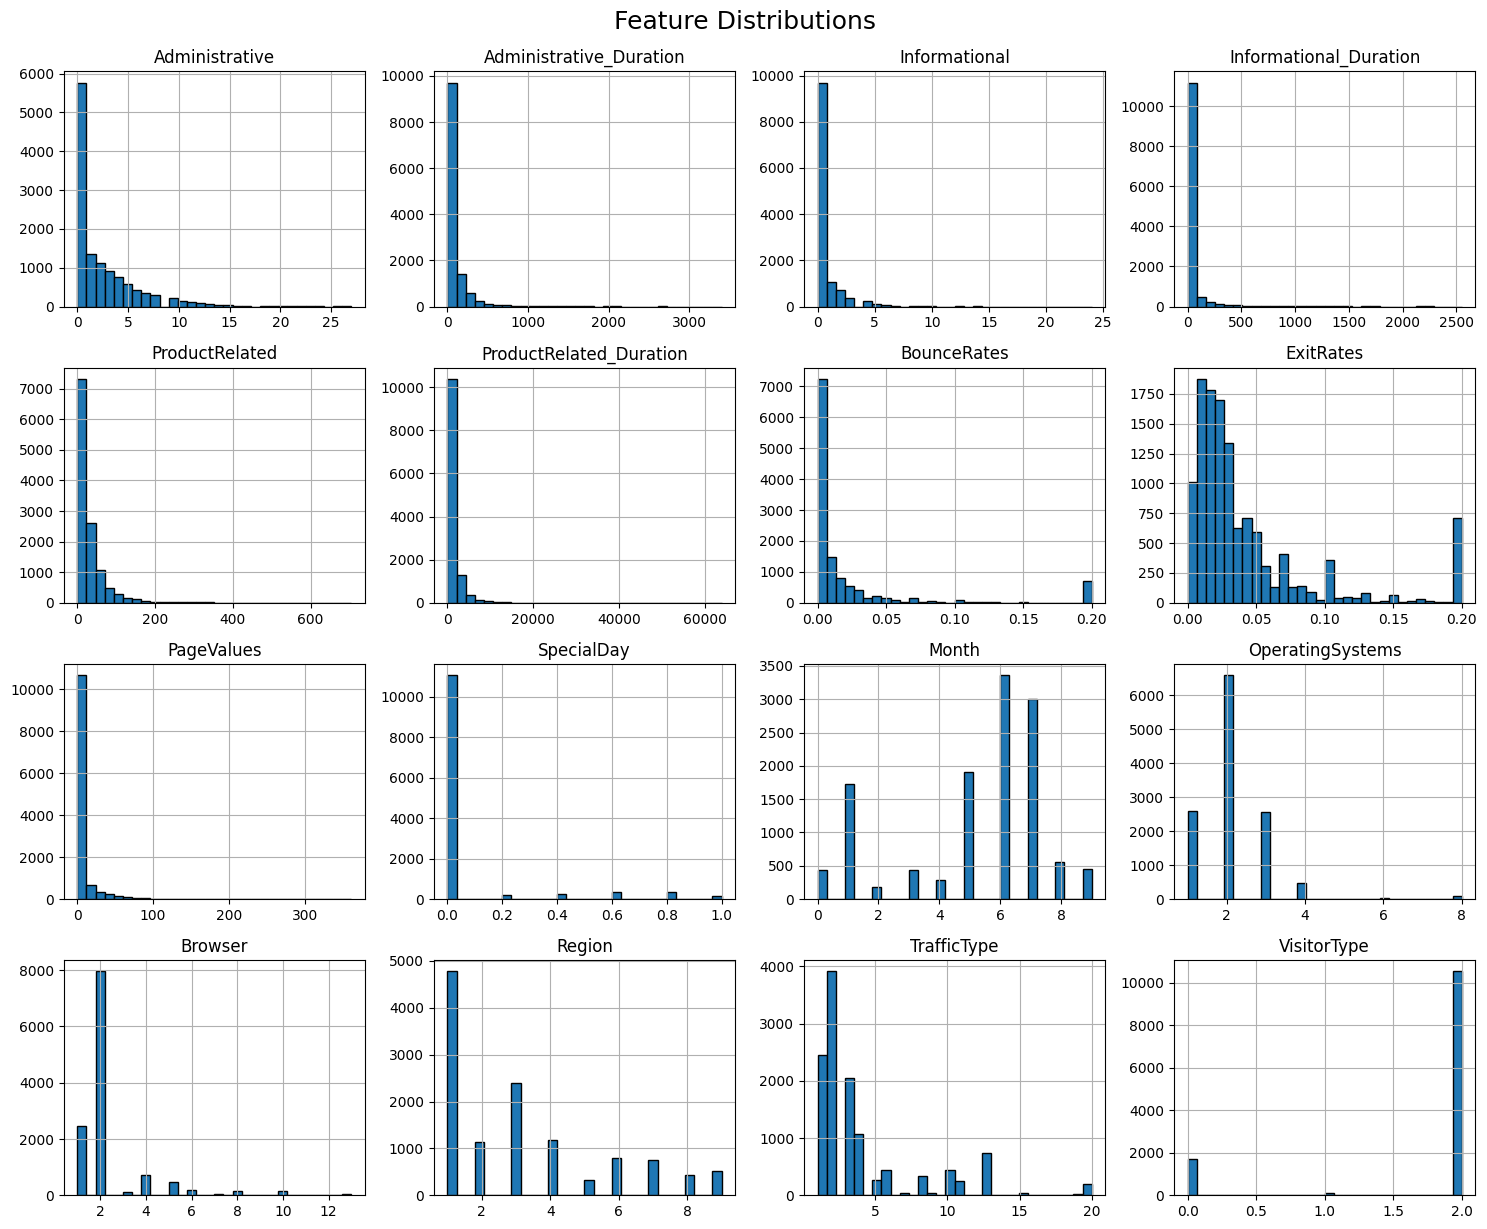

In [15]:
# Step 4: Visualize feature distributions
import matplotlib.pyplot as plt

data.hist(figsize=(15, 12), bins=30, edgecolor='black')
plt.tight_layout()
plt.suptitle("Feature Distributions", fontsize=18, y=1.02)
plt.show()


In [16]:
# Step 5: Split data
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(scaled_data, test_size=0.2, random_state=42)


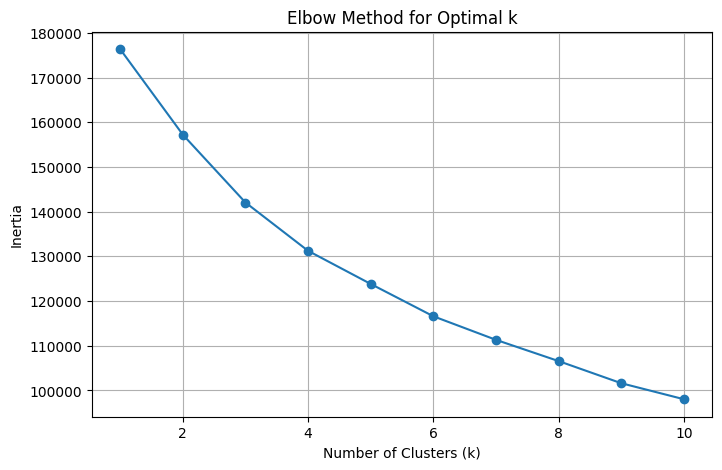

In [17]:
# Step 6: Elbow method
from sklearn.cluster import KMeans

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()


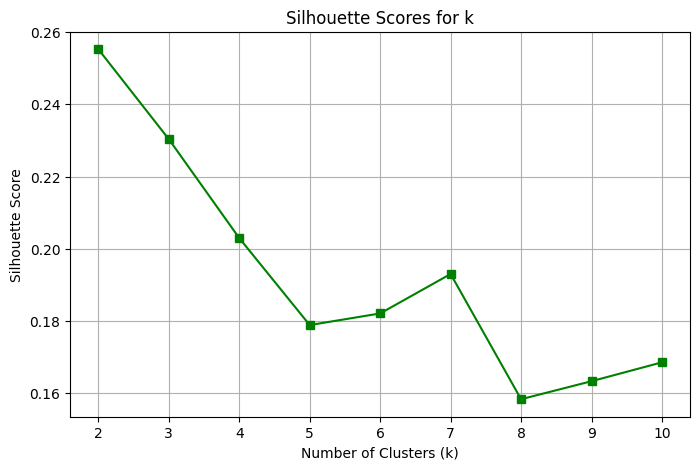

In [18]:
# Step 7: Silhouette Scores
from sklearn.metrics import silhouette_score

sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_train)
    sil_scores.append(silhouette_score(X_train, labels))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), sil_scores, marker='s', color='green')
plt.title("Silhouette Scores for k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


In [19]:
# Step 8: Final K-Means with best k (e.g., 5)
k_best = 5
kmeans_final = KMeans(n_clusters=k_best, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_train)


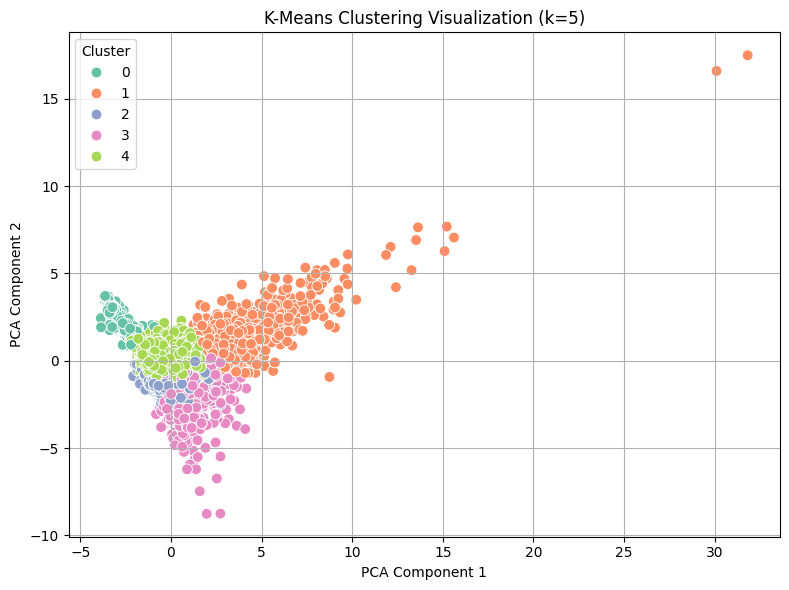

In [20]:
# Step 9: PCA for visualization
from sklearn.decomposition import PCA
import seaborn as sns

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='Set2', s=60)
plt.title(f"K-Means Clustering Visualization (k={k_best})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.tight_layout()
plt.show()